# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


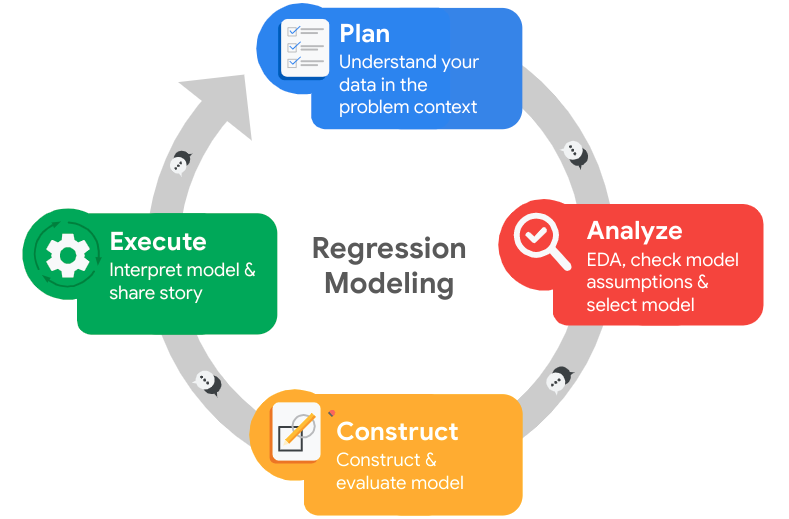

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'HR_capstone_dataset.csv'
hr_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(hr_data.head())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
file_path = 'HR_capstone_dataset.csv'
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [12]:
# Gather descriptive statistics about the data
descriptive_stats = df0.describe()

print(descriptive_stats)


       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [15]:
# Display all column names
print(df0.columns)



Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


In [16]:
# Display all column names before the update
print("Before renaming:")
print(df0.columns)

# Rename columns as needed
df0.rename(columns={
    'OldColumnName1': 'new_column_name1',
    'OldColumnName2': 'new_column_name2',
    # Add more columns as needed
}, inplace=True)

# Display all column names after the update
print("After renaming:")
print(df0.columns)


Before renaming:
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')
After renaming:
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [21]:
# Check for missing values in the data
missing_values = df0.isnull().sum()

# Display the number of missing values for each column
print("Missing values for each column:")
print(missing_values)


Missing values for each column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [24]:
# Check for duplicates
duplicates = df0[df0.duplicated()]
print(duplicates.head())


      satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_montly_hours  time_spend_company  work_accident  left  \
396                    139                   3              0     1   
866                    128                   3              0     1   
1317                   127                   3              0     1   
1368                   132                   3              0     1   
1461                   142                   3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368  

In [26]:
# Check for duplicates
duplicates = df0[df0.duplicated()]

print(duplicates.head())


      satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_montly_hours  time_spend_company  work_accident  left  \
396                    139                   3              0     1   
866                    128                   3              0     1   
1317                   127                   3              0     1   
1368                   132                   3              0     1   
1461                   142                   3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368  

In [31]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_cleaned = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
print("First few rows of the cleaned dataframe")
print(df_cleaned.head())


First few rows of the cleaned dataframe
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

### Check outliers

Check for outliers in the data.

AttributeError: module 'matplotlib' has no attribute 'show'

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [49]:
# Get numbers of people who left vs. stayed
left_counts = df0['left'].value_counts()
print("Counts of employees who left vs. stayed:")
print(left_counts)


# Get percentages of people who left vs. stayed
# Calculate the percentages of people who left vs. stayed
total_employees = len(df0)
left_percentage = (left_counts[1] / total_employees) * 100
stayed_percentage = (left_counts[0] / total_employees) * 100

print("Percentage of employees who left: {:.2f}%".format(left_percentage))
print("Percentage of employees who stayed: {:.2f}%".format(stayed_percentage))



Counts of employees who left vs. stayed:
0    11428
1     3571
Name: left, dtype: int64
Percentage of employees who left: 23.81%
Percentage of employees who stayed: 76.19%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

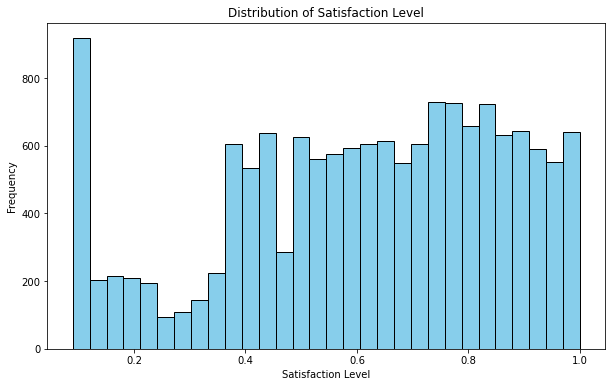

In [50]:
import matplotlib.pyplot as plt

# Plot histogram of a numerical variable, e.g., 'satisfaction_level'
# Histogram for Distribution of a Numerical Variable
plt.figure(figsize=(10, 6))
plt.hist(df0['satisfaction_level'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()



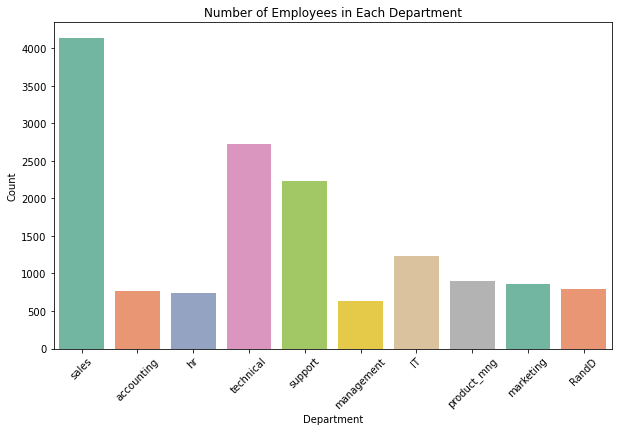

In [52]:
import seaborn as sns

# Plot bar plot of a categorical variable, e.g., 'department'
# Bar Plot for Categorical Variable Counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='department', palette='Set2')
plt.title('Number of Employees in Each Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


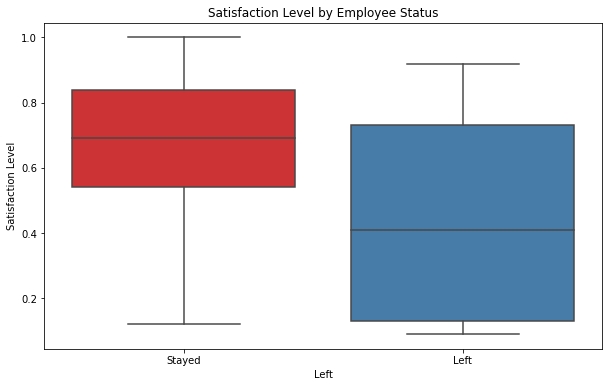

In [53]:
# Plot box plot to compare satisfaction levels by whether the employee left
# Box Plot to Compare Distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df0, x='left', y='satisfaction_level', palette='Set1')
plt.title('Satisfaction Level by Employee Status')
plt.xlabel('Left')
plt.ylabel('Satisfaction Level')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()



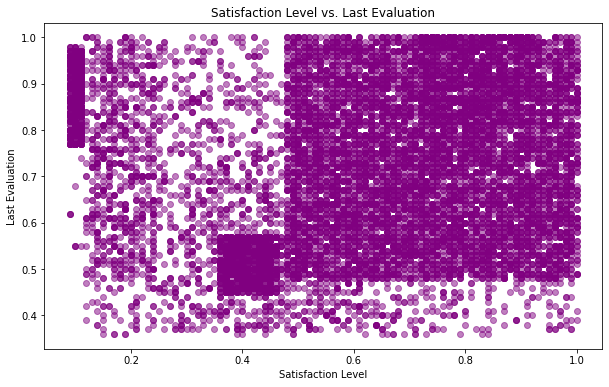

In [54]:
# Scatter Plot to Explore Relationships Between Two Numerical Variables
# Plot scatter plot to show relationship between 'satisfaction_level' and 'last_evaluation'
plt.figure(figsize=(10, 6))
plt.scatter(df0['satisfaction_level'], df0['last_evaluation'], alpha=0.5, color='purple')
plt.title('Satisfaction Level vs. Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()


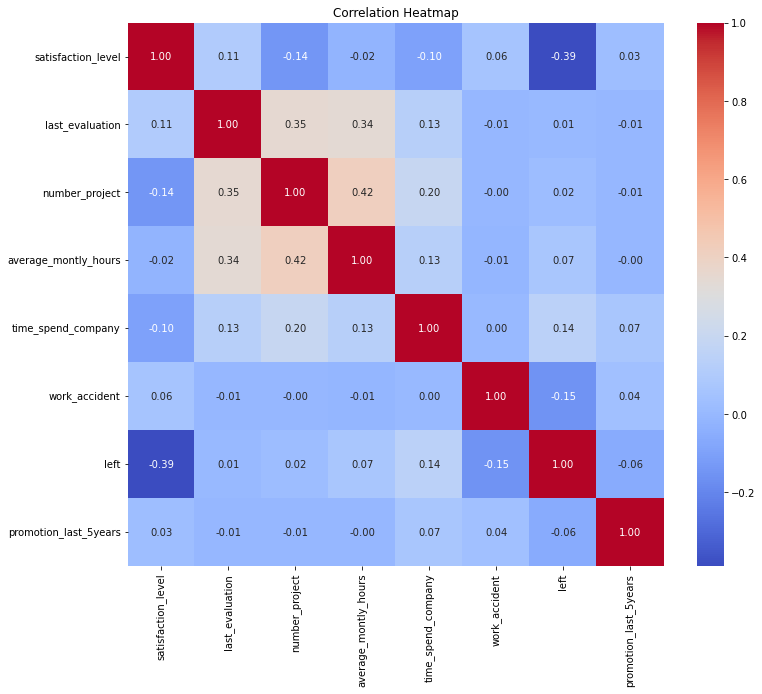

In [55]:
# Correlation Heatmap
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df0.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


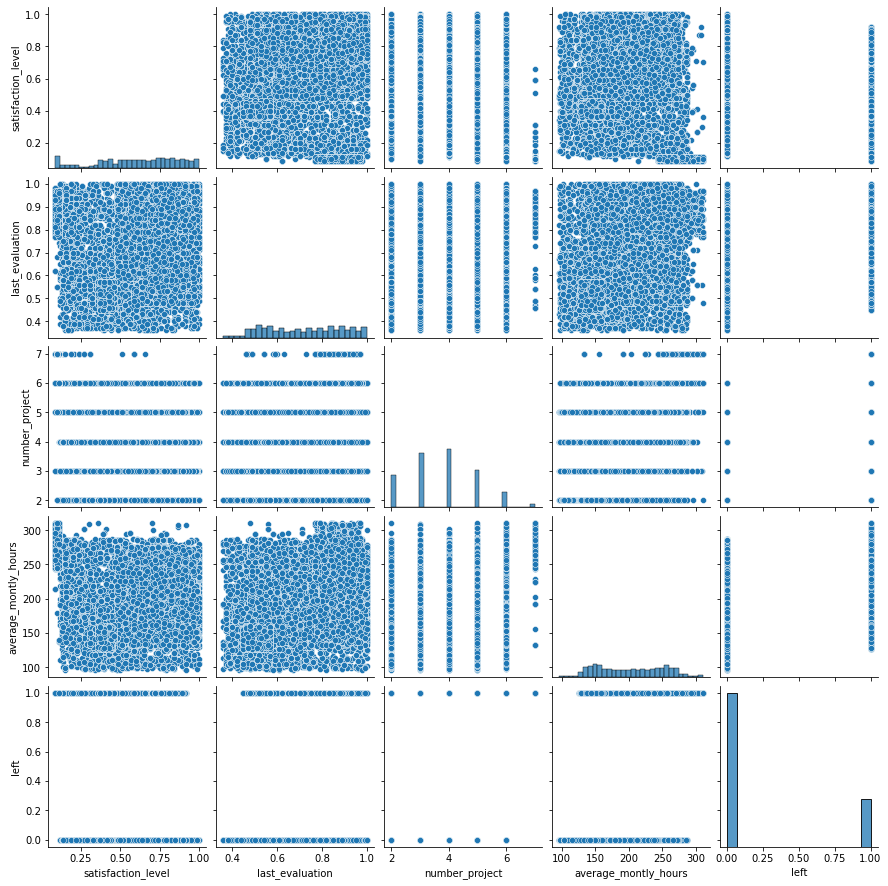

In [56]:
# Pair Plot for Relationships Between Multiple Variables
# Plot pair plot to visualize relationships between several numerical variables
sns.pairplot(df0[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'left']])
plt.show()


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
# Assuming df0 is your DataFrame and 'left' is the target variable
# Define features and target
X = df0.drop(columns=['left'])
y = df0['left']

# Handle categorical variables (if any)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
# Initialize and fit the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

print(X_test_scaled)

[[ 0.14531408  1.42186082  0.96885654 ... -0.46703614 -0.97173003
   1.14655761]
 [ 1.06839528  0.48802912 -0.64934658 ... -0.46703614  1.02909241
  -0.87217597]
 [ 0.30584994  1.53858978 -0.64934658 ... -0.46703614  1.02909241
  -0.87217597]
 ...
 [ 0.66705563 -1.08781186 -0.64934658 ... -0.46703614  1.02909241
  -0.87217597]
 [ 1.2690651  -0.79598945  0.96885654 ... -0.46703614 -0.97173003
   1.14655761]
 [ 0.10518012 -0.9710829  -0.64934658 ... -0.46703614 -0.97173003
  -0.87217597]]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3428
           1       0.59      0.34      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500

Confusion Matrix:
[[3170  258]
 [ 705  367]]


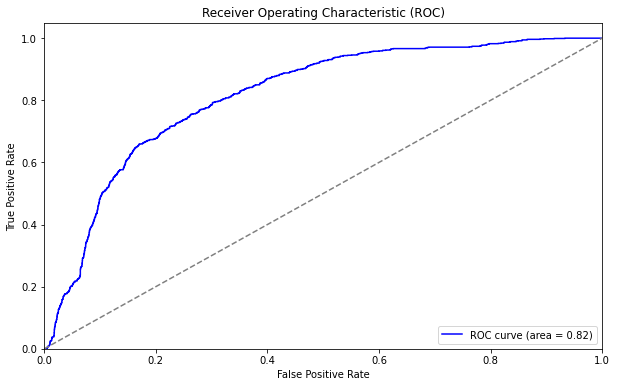

In [63]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [64]:
import statsmodels.api as sm

# Add a constant to the features matrix for the intercept
X_train_sm = sm.add_constant(X_train_scaled)

# Fit the model
model_sm = sm.Logit(y_train, X_train_sm)
result = model_sm.fit()

# Print summary to check multicollinearity and other diagnostics
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.425451
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10480
Method:                           MLE   Df Model:                           18
Date:                Wed, 31 Jul 2024   Pseudo R-squ.:                  0.2247
Time:                        05:15:05   Log-Likelihood:                -4466.8
converged:                       True   LL-Null:                       -5761.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6132      0.033    -49.195      0.000      -1.677      -1.549
x1            -1.0429      0.

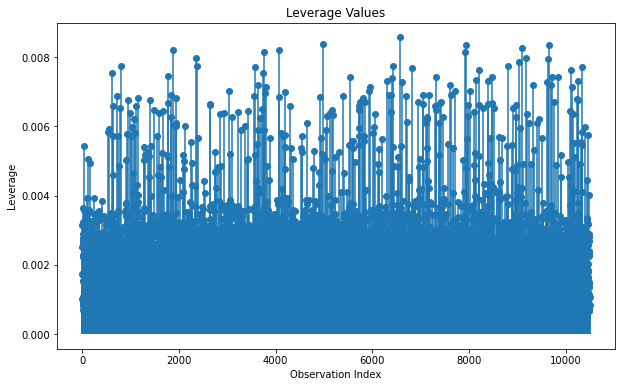

In [66]:
import numpy as np

# Calculate hat values
# For logistic regression, calculate the leverage values manually
X_train_sm = sm.add_constant(X_train_scaled)
hat_values = np.diag(X_train_sm @ np.linalg.inv(X_train_sm.T @ X_train_sm) @ X_train_sm.T)

# Plot Leverage Values
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(hat_values)), hat_values, basefmt=" ", use_line_collection=True)
plt.title("Leverage Values")
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.show()


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.